      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors
0    313000         3       1.50         1340      7912     1.5
1   2384000         5       2.50         3650      9050     2.0
2    342000         3       2.00         1930     11947     1.0
3    420000         3       2.25         2000      8030     1.0
4    550000         4       2.50         1940     10500     1.0
..      ...       ...        ...          ...       ...     ...
94   524000         3       1.75         1560      5520     1.0
95   541125         5       2.75         2740      8426     1.0
96   670000         3       2.50         1680      2000     3.0
97   384900         5       2.50         3090     12750     1.0
98   406100         3       2.25         1410      1332     3.0

[99 rows x 6 columns]


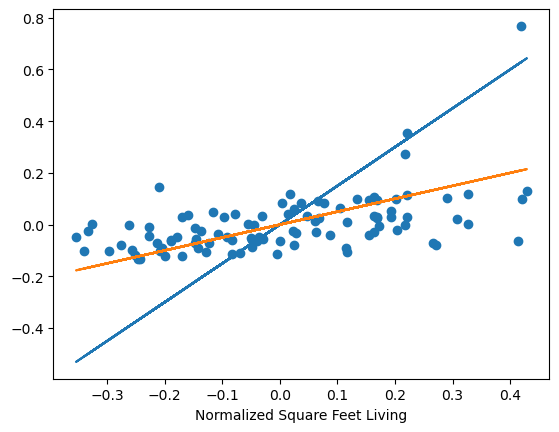

Cost Function: 0.03141547024009816


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data_mod.csv'
data = pd.read_csv(file_path)
print(data)


x = data["sqft_living"]
y = data["price"]

x_norm = (x - x.mean()) / x.max()
y_norm = (y - y.mean()) / y.max()

q0 = 0
q1 = 1.5


import matplotlib.pyplot as plt
plt.scatter(x_norm, y_norm, label="Data Points")
plt.plot(x_norm, q0 + q1 * x_norm, label="Initial Regression Line")
plt.plot(x_norm, q0 + 0.5 * x_norm, label="Final Regression Line")
plt.xlabel("Normalized Square Feet Living")


plt.show()


n = len(x)
cost = (1 / (2 * n)) * np.sum((q0 + q1 * x_norm - y_norm) ** 2)

print(f"Cost Function: {cost}")



Final Regression Coefficients: q0 = {q0}, q1 = {q1}


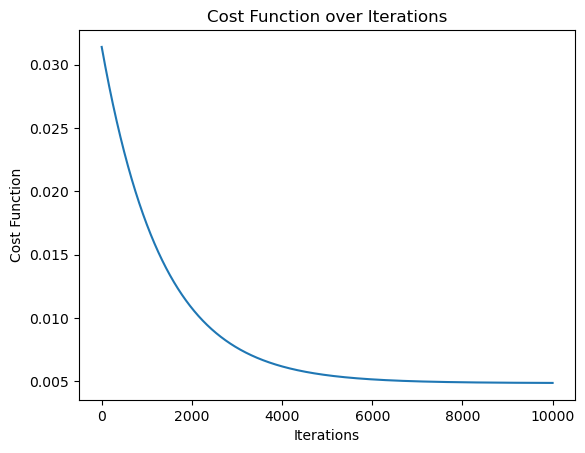

In [3]:
alpha = 0.01 
iter = 10000  

cost_function = []

for i in range(iter):
    
    theta0_gradient = (1 / n) * np.sum(q0 + q1 * x_norm - y_norm)
    theta1_gradient = (1 / n) * np.sum(
        (q0 + q1 * x_norm - y_norm) * x_norm
    )

  
    q0 -= alpha * theta0_gradient
    q1 -= alpha * theta1_gradient

   
    cost = (1 / (2 * n)) * np.sum((q0 + q1 * x_norm - y_norm) ** 2)
    cost_function.append(cost)

# Print final regression coefficients
print("Final Regression Coefficients: q0 = {q0}, q1 = {q1}")

# Plot the cost function over iterations
plt.plot(range(iter), cost_function)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function over Iterations")
plt.show()
